In [1]:
import scipy
import sys

sys.path.append("./src/")
import pycvxcluster.pycvxcluster
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from pycvxcluster.algos.michael import mse_clusters
from pycvxcluster.algos.michael import compute_weight_matrix
from pycvxcluster.algos.michael import centroid_bound

# Testing (nothing useful here)

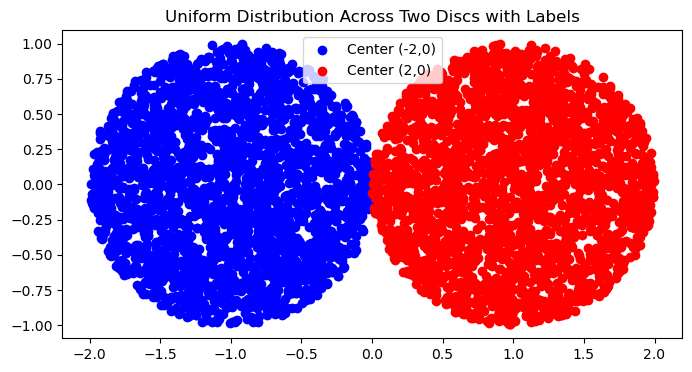

((5000, 2), (5000,))

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_disc_samples(centers, radius, num_samples):
    # Generating angles and radii
    angles = np.random.uniform(0, 2 * np.pi, num_samples)
    radii = np.sqrt(np.random.uniform(0, 1, num_samples)) * radius

    # Randomly assigning discs
    disc_indices = np.random.randint(0, len(centers), num_samples)
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)

    # Adjusting coordinates based on the center of each disc
    for i, center in enumerate(centers):
        mask = disc_indices == i
        x[mask] += center[0]
        y[mask] += center[1]

    # Creating X and y arrays
    X = np.vstack((x, y)).T  # Combine x and y coordinates into a single array
    y = disc_indices  # Labels indicating the center of each point

    return X, y

# Parameters
num_samples = 5000
radius = 1
centers = [(-1, 0), (1, 0)]
centers_array = np.array(centers)

# Generate samples and centroids
X, y = generate_disc_samples(centers, radius, num_samples)

# Plotting the points with labels
plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Center (-2,0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Center (2,0)')
plt.axis('equal')
plt.title('Uniform Distribution Across Two Discs with Labels')
plt.legend()
plt.show()
X.shape, y.shape


In [4]:
import scipy.linalg as la
from pycvxcluster.algos.michael import compute_weight_matrix
gamma = X.shape[0]**(2/(3*X.shape[1]))
weight_matrix, _ = compute_weight_matrix(X.T, gamma=gamma, omega=0.2)

Computing weight matrix...
Weight matrix computed in 1.2539986670017242 seconds.


In [5]:
#get X row 1 and 2
Xt = X.T
X0 = X[[0],:]
X1 = X[[1],:]
X0, X1

(array([[-0.89269475,  0.49948977]]), array([[0.25226738, 0.10968948]]))

In [6]:
test = gamma**(X.shape[1]+1) / np.exp(gamma * la.norm(X0 - X1))
test

5.210100019701579e-06

In [7]:
weight_matrix[0,1]

0.0

/Users/michaelthomas/Desktop/Semester 4/math466/project/pycvxcluster-main/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)


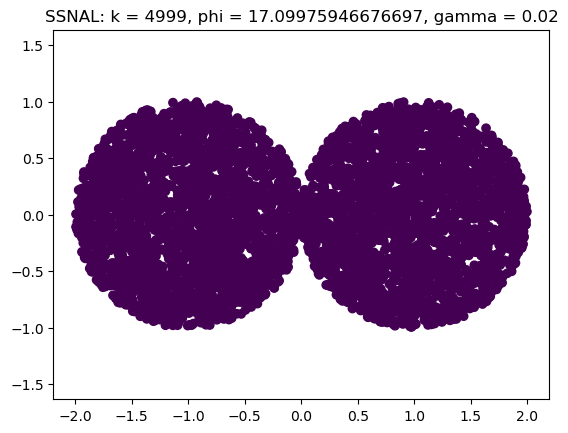

In [8]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X.shape[0]-1, phi=gamma, gamma=0.02)

ssnal.fit(X=X, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

plt.scatter(X[:, 0], X[:, 1], c=ssnal.labels_)  # Use all samples and proper feature indexing

plt.title(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

In [9]:
X.shape, y.shape

((5000, 2), (5000,))

In [10]:
ssnal_labels = ssnal.labels_ - 1
ssnal_labels[:10], y[:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0]))

In [11]:
pred = ssnal.labels_ - 1
y_array = np.array(y)
mse_clusters(X, y, pred, centers_array)

0.9999953463073449

In [12]:
Xt = np.array([[10,0,0],[0,0,0]])
yt = np.array([1,1])
predt = np.array([0,1])
centers_arrayt = np.array([[10,0,0],[0,0,0]])


mse_clusters(Xt, yt, predt, centers_arrayt)

50.0

In [13]:
N, d = X.shape
N**(-1/(8*d))
2*4*0.002*(gamma**(-1/3))

0.006210453515770285

In [14]:
N, d, d_prime = 10000, 2, 4/3
#gamma*N**(-1/max(d,2))*(np.log(N))**(1/d_prime)+(1+lambd)*gamma**(-1/3)

# Start here

## make shapes

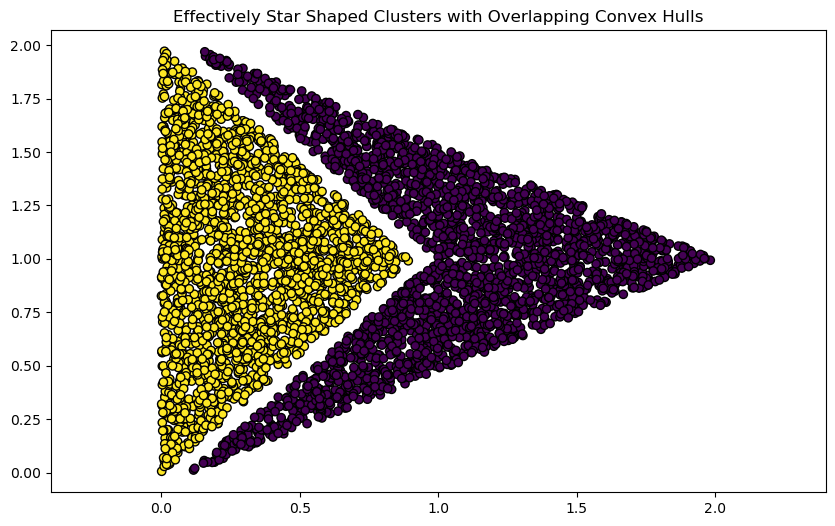

((4747, 2), (4747,))

In [90]:
# two star shaped polygons with overlapping convex hulls
import matplotlib.path as mplPath

# Define the vertices of the polygons (clusters)
vertices1 = np.array([[0.1,0], [1,1], [0.1,2], [2,1]])
vertices2 = np.array([[0,0], [0,2], [.9,1]])

# Define paths for the two clusters
path1 = mplPath.Path(vertices1)
path2 = mplPath.Path(vertices2)

# Determine the overall bounding box
min_x = min(vertices1[:,0].min(), vertices2[:,0].min())
max_x = max(vertices1[:,0].max(), vertices2[:,0].max())
min_y = min(vertices1[:,1].min(), vertices2[:,1].min())
max_y = max(vertices1[:,1].max(), vertices2[:,1].max())

# Generate a set of random points within the bounding box that contains both clusters
n_points = 10000  # number of random points to start with
#X_random = np.random.rand(n_points, 2) * np.array([2, 2])  # scale and translate points

random_x = np.random.uniform(min_x, max_x, n_points)
random_y = np.random.uniform(min_y, max_y, n_points)
X_random = np.column_stack((random_x, random_y))

# Check which points are inside each cluster
inside_cluster1 = path1.contains_points(X_random)
inside_cluster2 = path2.contains_points(X_random)

# Filter points to only those within the clusters and create the labels vector
X_inside_cluster1 = X_random[inside_cluster1, :]
X_inside_cluster2 = X_random[inside_cluster2, :]
X_poly = np.vstack((X_inside_cluster1, X_inside_cluster2))
y_poly = np.hstack((np.zeros(X_inside_cluster1.shape[0], dtype=int), np.ones(X_inside_cluster2.shape[0], dtype=int)))

# Calculate the means of each cluster
mean_cluster1 = np.mean(X_poly[y_poly == 0], axis=0)
mean_cluster2 = np.mean(X_poly[y_poly == 1], axis=0)

# Store the means in an np array
centers_poly = np.array([mean_cluster1, mean_cluster2])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=y_poly, edgecolor='k')
plt.title('Effectively Star Shaped Clusters with Overlapping Convex Hulls')
plt.xlim(-0.4, 2.4)
plt.show()

# Return the shape of X and y to confirm the sizes
X_poly.shape, y_poly.shape


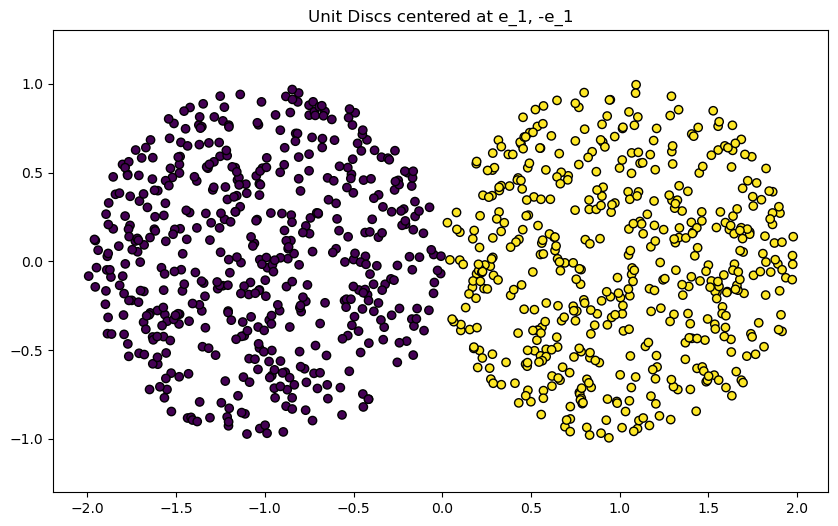

In [16]:
# Function to generate random points within a circle
def generate_circle_samples(center, radius, num_samples):
    # Generate random angles
    angles = np.random.uniform(0, 2 * np.pi, num_samples)
    # Generate random radii
    radii = np.sqrt(np.random.uniform(0, radius**2, num_samples))
    # Convert polar coordinates to Cartesian coordinates
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    return np.column_stack((x, y))

# Number of points to generate
N=1000
random_assignment = np.random.randint(0, 2, N+1)
num_samples1 = len(random_assignment[random_assignment == 0])
num_samples2 = len(random_assignment[random_assignment == 1])


# Generate samples for each circle
circle1_samples = generate_circle_samples(center=(-1, 0), radius=1, num_samples=num_samples1)
circle2_samples = generate_circle_samples(center=(1, 0), radius=1, num_samples=num_samples2)

# Combine the samples and assign labels
X_disc = np.vstack((circle1_samples, circle2_samples))
y_disc = np.hstack((np.zeros(num_samples1, dtype=int), np.ones(num_samples2, dtype=int)))

# Store the means in an np array
centers_disc = np.array([(-1,0), (1,0)])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_disc[:, 0], X_disc[:, 1], c=y_disc, edgecolor='k')
plt.title('Unit Discs centered at e_1, -e_1')
plt.axis('equal')
plt.show()

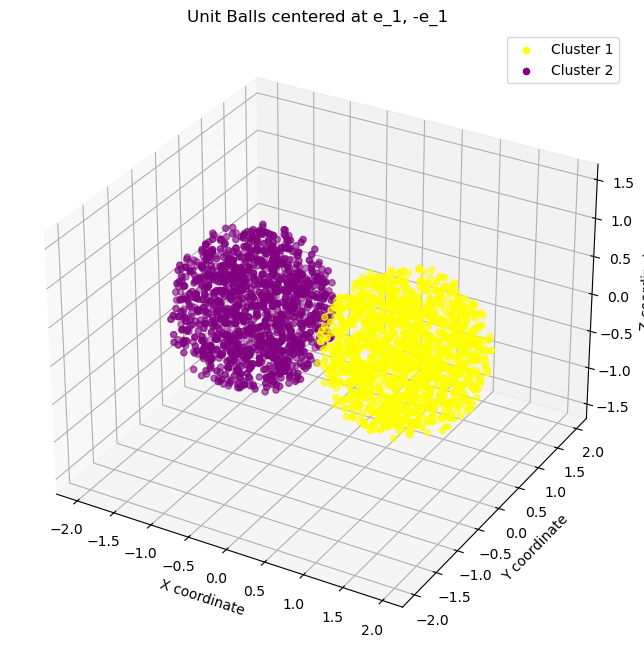

In [17]:
def unit_balls(N, d):
    def generate_points_in_cube(d, num_samples):
        # Generate random points in a d-dimensional cube
        points = np.random.uniform(-1, 1, (num_samples, d))
        return points

    def points_in_unit_ball(points):
        # Calculate the squared distance from the origin for each point
        squared_distances = np.sum(points**2, axis=1)
        # A point is in the unit ball if its squared distance from the origin is less than or equal to 1
        mask = squared_distances <= 1
        return points[mask]

    # Define the number of dimensions and the number of points to sample
    random_assignment = np.random.randint(0, 2, N)
    num_samples1 = len(random_assignment[random_assignment == 0])
    num_samples2 = len(random_assignment[random_assignment == 1])

    # Generate random points in a d-dimensional cube
    e1 = np.zeros(d)
    e1[0] = 1
    cluster1 = generate_points_in_cube(d, num_samples1)
    cluster2 = generate_points_in_cube(d, num_samples2) 

    cluster1 = points_in_unit_ball(cluster1) + e1
    cluster2 = points_in_unit_ball(cluster2) - e1

    # Combine the samples and assign labels
    X = np.vstack((cluster1, cluster2))
    y = np.hstack((np.zeros(len(cluster1), dtype=int), np.ones(len(cluster2),  dtype=int)))

    # Store the means in an np array
    centers = np.array([e1, -e1])
    return X, y, centers, d

X_ball, y_ball, centers_ball, d = unit_balls(5000, 3)

if d == 3:
    # Plotting in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_ball[y_ball == 0][:, 0], X_ball[y_ball == 0][:, 1], X_ball[y_ball == 0][:, 2], c='yellow', label='Cluster 1')
    ax.scatter(X_ball[y_ball == 1][:, 0], X_ball[y_ball == 1][:, 1], X_ball[y_ball == 1][:, 2], c='purple', label='Cluster 2')
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.set_zlabel('Z coordinate')
    ax.set_title('Unit Balls centered at e_1, -e_1')
    plt.axis('equal')
    plt.legend()
    plt.show()

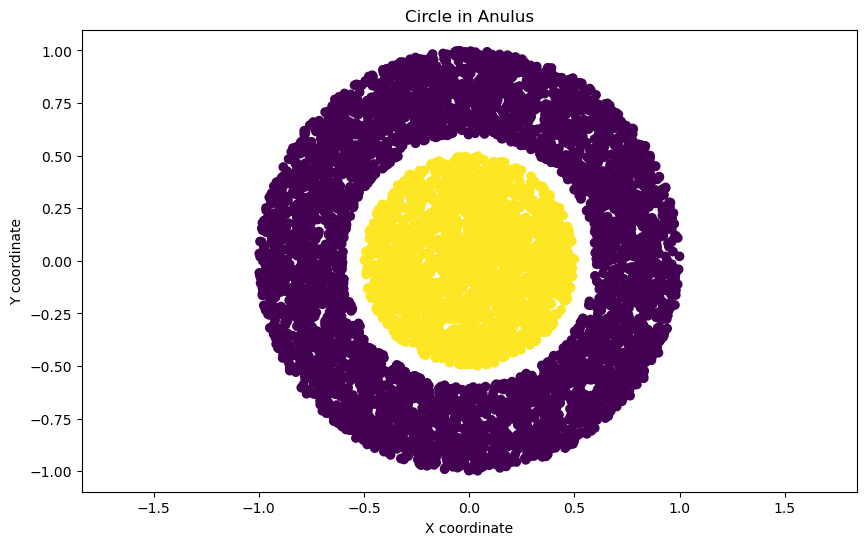

In [113]:
# make circle in anulus
def points_in_anulus(points, inner_radius, outer_radius):
        # Calculate the squared distance from the origin for each point
        squared_distances = np.sum(points**2, axis=1)
        # A point is in the unit ball if its squared distance from the origin is less than or equal to 1
        mask = (squared_distances >= inner_radius**2) & (squared_distances <= outer_radius**2)
        return points[mask]

def generate_points_in_cube(d, num_samples):
        # Generate random points in a d-dimensional cube
        points = np.random.uniform(-1, 1, (num_samples, d))
        return points


points_in_square = generate_points_in_cube(2, 10000)
cluster1 = points_in_anulus(points_in_square, 0.6, 1)
cluster2 = points_in_anulus(points_in_square, 0, 0.5)

# Combine the samples and assign labels
X_anulus = np.vstack((cluster1, cluster2))
y_anulus = np.hstack((np.zeros(len(cluster1), dtype=int), np.ones(len(cluster2), dtype=int)))
centers_anulus = np.array([[0,0], [0,0]])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_anulus[:, 0], X_anulus[:, 1], c=y_anulus)
plt.title('Circle in Anulus')
plt.axis('equal')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

## SON on each shape

### circles

In [19]:
N, d = X_disc.shape
gamma = N**(3/(4*d))
weight_matrix, _ = compute_weight_matrix(X_disc.T, gamma=gamma, omega=0.8)

lambd = 0.005
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_disc.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_disc, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

Computing weight matrix...
Weight matrix computed in 0.6041575828567147 seconds.


SSNAL(gamma=0.005, k=1000, maxiter=2000, phi=13.340213465129343)

In [20]:
pred = np.array(ssnal.labels_) - 1
y_array = np.array(y_disc)
mse = mse_clusters(X_disc, y_array, pred, centers_disc)
mse

0.02947781800068062

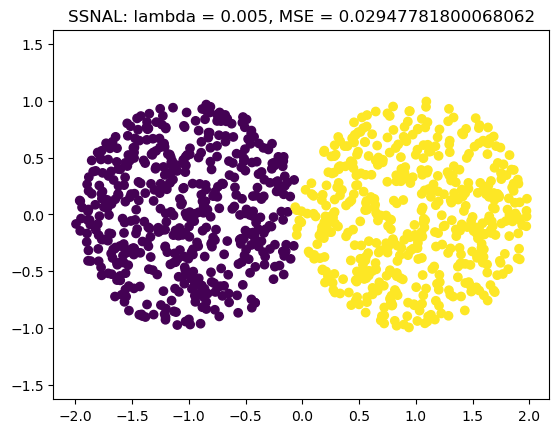

In [21]:
plt.scatter(X_disc[:, 0], X_disc[:, 1], c=pred)

plt.title(f"SSNAL: lambda = {lambd}, MSE = {mse}")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

### polygons

In [91]:
N, d = X_poly.shape
gamma = N**(3/(4*d))*9
weight_matrix, _ = compute_weight_matrix(X_poly.T, gamma=gamma, omega=0.2)

lambd = 10
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_poly.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_poly, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

Computing weight matrix...
Weight matrix computed in 3.4182884572073817 seconds.


SSNAL(gamma=10, k=4746, maxiter=2000, phi=215.2284714456001)

In [94]:
pred = np.array(ssnal.labels_) - 1
mse = mse_clusters(X_poly, y_poly, pred, centers_poly)
mse, pred.max()

(0.0, 1)

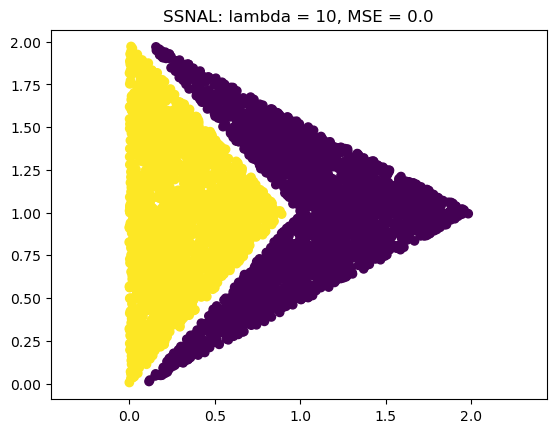

In [95]:
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=pred)

plt.title(f"SSNAL: lambda = {lambd}, MSE = {mse}")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

In [26]:
X_polyt = np.zeros((100, 2), dtype=int)

centroid_bound(X_polyt, gamma, lambd)

4.202448396345407

In [27]:
X_ball.shape

(2538, 3)

### d-balls

In [28]:
N, d = X_ball.shape
gamma = N**(3/(4*d))
weight_matrix, _ = compute_weight_matrix(X_ball.T, gamma=gamma, omega=1)

lambd = 0.0005
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_ball.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_ball, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

Computing weight matrix...
Weight matrix computed in 4.459818082861602 seconds.


SSNAL(gamma=0.0005, k=2537, maxiter=2000, phi=7.097786054203099)

In [29]:
pred = np.array(ssnal.labels_) - 1
mse = mse_clusters(X_ball, y_ball, pred, centers_ball)
mse, pred.max()

(0.0063028404449698375, 4)

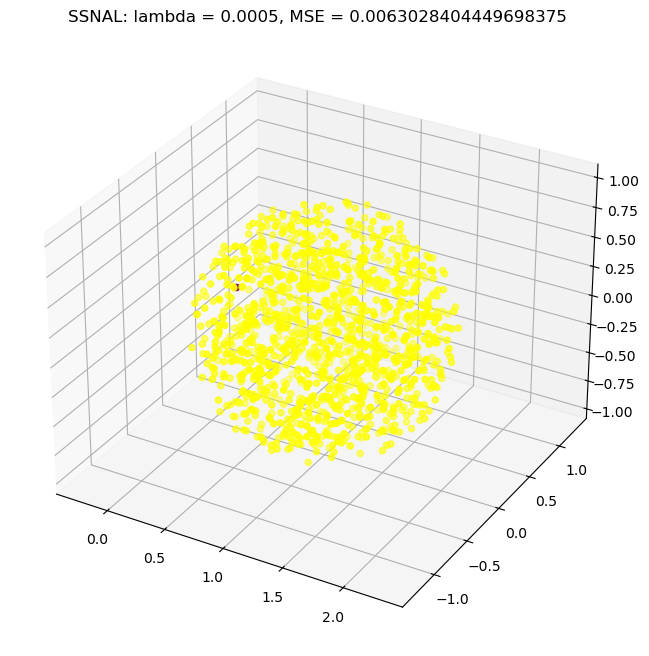

In [30]:
# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_ball[pred == 0][:, 0], X_ball[pred == 0][:, 1], X_ball[pred == 0][:, 2], c='yellow')
ax.scatter(X_ball[pred == 1][:, 0], X_ball[pred == 1][:, 1], X_ball[pred == 1][:, 2], c='purple')
ax.set_title(f"SSNAL: lambda = {lambd}, MSE = {mse}")
plt.axis('equal')
plt.show()

In [31]:
centroid_bound(X_ball, gamma, lambd)

1.5542758050425451

### Circle in Anulus

In [135]:
N, d = X_anulus.shape
gamma = N**(3/(4*d))*10
weight_matrix, _ = compute_weight_matrix(X_anulus.T, gamma=gamma, omega=0.18)

lambd = 1000
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_anulus.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_anulus, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

Computing weight matrix...
Weight matrix computed in 7.714439874514937 seconds.


SSNAL(gamma=1000, k=6988, maxiter=2000, phi=276.474855773134)

In [136]:
pred = np.array(ssnal.labels_) - 1
mse = mse_clusters(X_anulus, y_anulus, pred, centers_anulus)
mse, pred.max()

(0.00020950655499350892, 1)

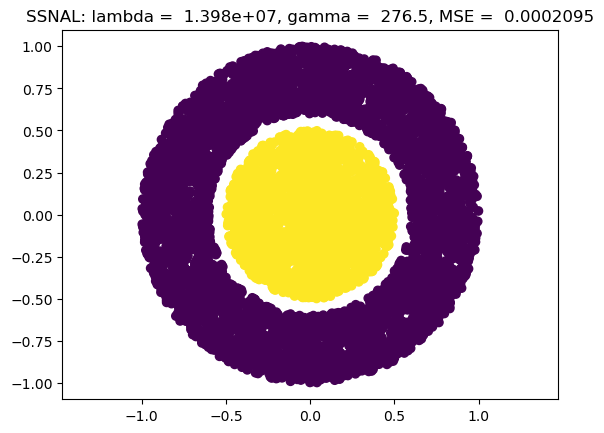

In [137]:
plt.scatter(X_anulus[:, 0], X_anulus[:, 1], c=pred)

plt.title(f"SSNAL: lambda = {lambd*2*N: .4g}, gamma = {gamma: .4g}, MSE = {mse: .4g}")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

In [112]:
centroid_bound(X_anulus, gamma, lambd)

8.681535851401703

In [36]:
N, d, d_prime = 10000000000, 2, 4/3
gamma = N**(3/(4*d))
gamma*N**(-1/max(d,2))*(np.log(N))**(1/d_prime)+(1+lambd)*gamma**(-1/3)

0.7035693636520876

## K-means on each shape

### circles

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X_disc)
y_pred = kmeans.predict(X_disc)

/Users/michaelthomas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


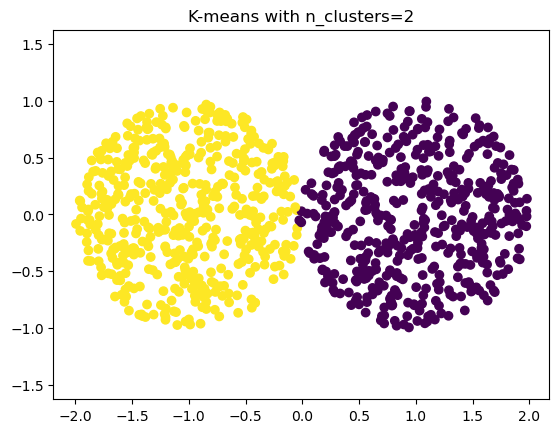

In [38]:
plt.scatter(X_disc[:, 0], X_disc[:, 1], c=y_pred)

plt.title(f"K-means with n_clusters=2")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

### polygons

In [39]:
kmeans = KMeans(n_clusters=2, init='random', ).fit(X_poly)
y_pred = kmeans.predict(X_poly)

/Users/michaelthomas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


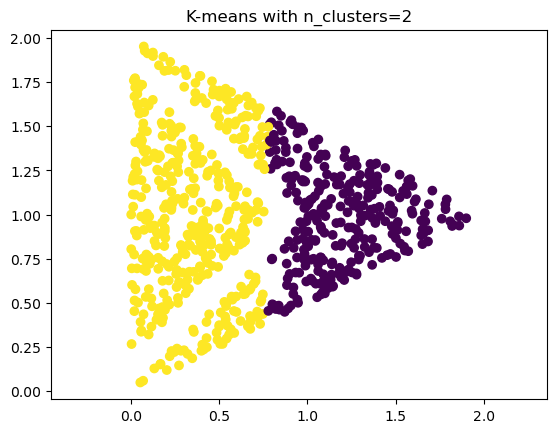

In [40]:
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=y_pred)

plt.title(f"K-means with n_clusters=2")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

In [41]:
y_pred = kmeans.predict(X_poly)
mse_clusters(X_poly, y_poly, y_pred, centers=centers_poly)

0.09529850952510285

### d-balls

In [42]:
kmeans = KMeans(n_clusters=2, init='random', ).fit(X_ball)
y_pred = kmeans.predict(X_ball)

/Users/michaelthomas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


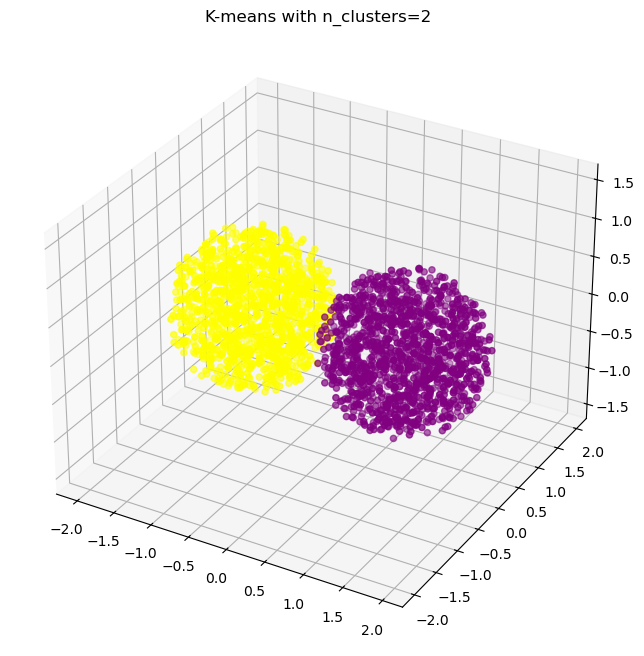

In [43]:
# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_ball[y_pred == 0][:, 0], X_ball[y_pred == 0][:, 1], X_ball[y_pred == 0][:, 2], c='yellow')
ax.scatter(X_ball[y_pred == 1][:, 0], X_ball[y_pred == 1][:, 1], X_ball[y_pred == 1][:, 2], c='purple')
ax.set_title(f"K-means with n_clusters=2")
plt.axis('equal')
plt.show()

In [44]:
centroid_bound(X_ball, gamma, lambd)

819.0650946972888

### Circle in Anulus

In [45]:
kmeans = KMeans(n_clusters=4, init='random', ).fit(X_anulus)
y_pred = kmeans.predict(X_anulus)

/Users/michaelthomas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


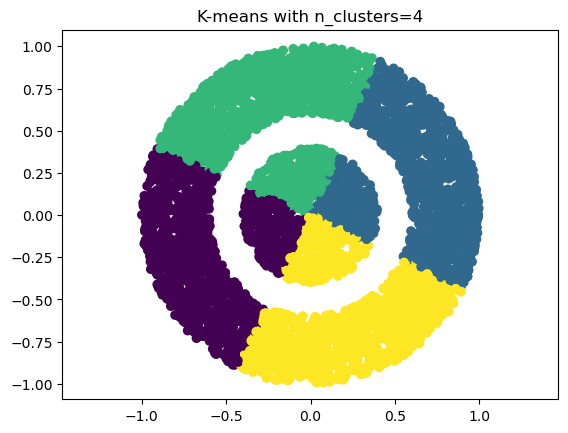

In [63]:
plt.scatter(X_anulus[:, 0], X_anulus[:, 1], c=y_pred)

plt.title(f"K-means with n_clusters=4")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

In [47]:
centroid_bound(X_anulus, gamma, lambd)

395.40465538239704

In [48]:
N, d, d_prime = 10000000000, 2, 4/3
gamma = N**(3/(4*d))
gamma*N**(-1/max(d,2))*(np.log(N))**(1/d_prime)+(1+lambd)*gamma**(-1/3)

0.7035693636520876

## Unweighted SON on each shape

### circles

In [49]:
N, d = X_disc.shape
gamma = 1
weight_matrix = np.ones((X_disc.shape[0], X_disc.shape[0]))
for i in range(X_disc.shape[0]):
    weight_matrix[i,i] = 0

lambd = 0.003
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_disc.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_disc, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

/Users/michaelthomas/Desktop/Semester 4/math466/project/pycvxcluster-main/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/michaelthomas/Desktop/Semester 4/math466/project/pycvxcluster-main/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


SSNAL(gamma=0.003, k=1000, maxiter=2000, phi=1)

In [50]:
pred = np.array(ssnal.labels_) - 1
y_array = np.array(y_disc)
mse = mse_clusters(X_disc, y_array, pred, centers_disc)
mse, pred.max()

(1.0002794362990826, 0)

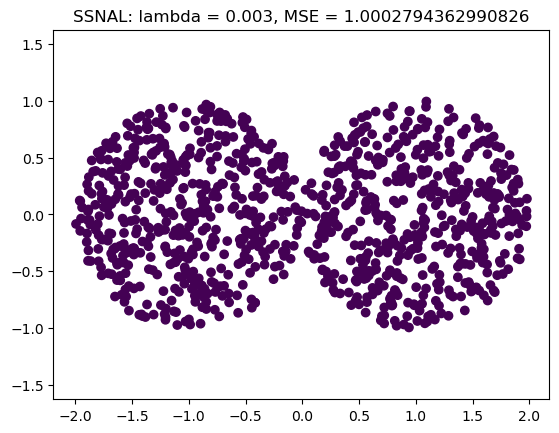

In [51]:
plt.scatter(X_disc[:, 0], X_disc[:, 1], c=pred)

plt.title(f"SSNAL: lambda = {lambd}, MSE = {mse}")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

### polygons

In [52]:
N, d = X_poly.shape
gamma = 1
weight_matrix = np.ones((X_poly.shape[0], X_poly.shape[0]))
for i in range(X_poly.shape[0]):
    weight_matrix[i,i] = 0

lambd = 0.001
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_poly.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_poly, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

SSNAL(gamma=0.001, k=750, maxiter=2000, phi=1)

In [53]:
pred = np.array(ssnal.labels_) - 1
mse = mse_clusters(X_poly, y_poly, pred, centers_poly)
mse

0.2597252709058

In [54]:
X_poly.shape, y_poly.shape, pred.shape, centers_poly.shape
y_poly[0:10], pred.max()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 749)

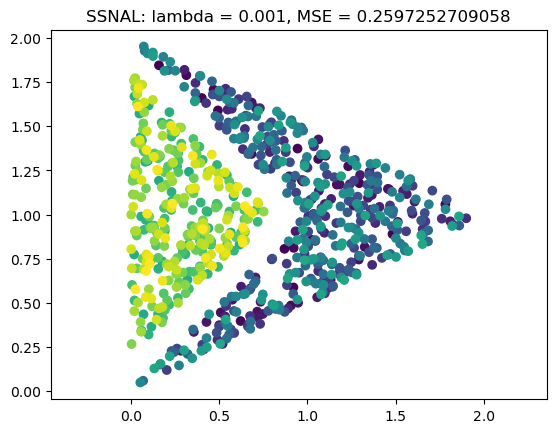

In [55]:
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=pred)

plt.title(f"SSNAL: lambda = {lambd}, MSE = {mse}")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

In [56]:
X_polyt = np.zeros((100, 2), dtype=int)

centroid_bound(X_polyt, gamma, lambd)

1.3153650547438605

In [57]:
X_ball.shape

(2538, 3)

### d-balls

In [58]:
N, d = X_ball.shape
gamma = N**(3/(4*d))
weight_matrix, _ = compute_weight_matrix(X_ball.T, gamma=gamma, omega=1)

lambd = 0.0005
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_ball.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_ball, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

Computing weight matrix...
Weight matrix computed in 4.233437875285745 seconds.


SSNAL(gamma=0.0005, k=2537, maxiter=2000, phi=7.097786054203099)

In [59]:
pred = np.array(ssnal.labels_) - 1
mse = mse_clusters(X_ball, y_ball, pred, centers_ball)
mse, pred.max()

(0.0063028404449698375, 4)

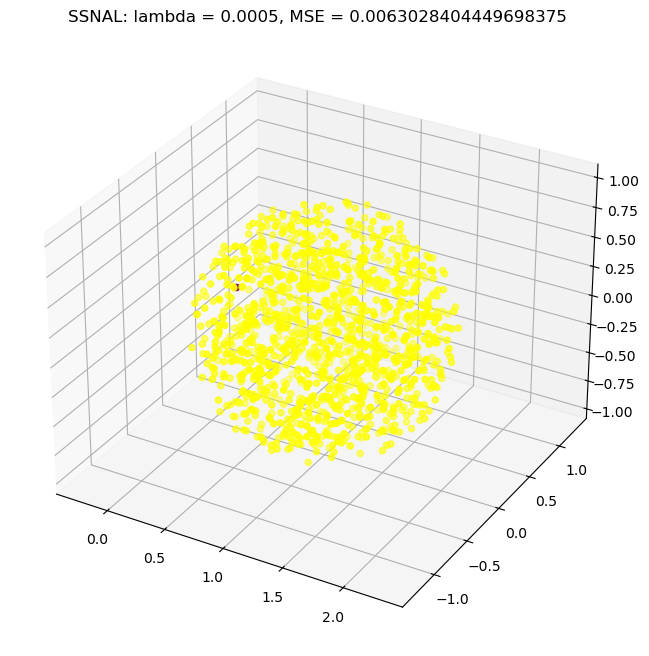

In [60]:
# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_ball[pred == 0][:, 0], X_ball[pred == 0][:, 1], X_ball[pred == 0][:, 2], c='yellow')
ax.scatter(X_ball[pred == 1][:, 0], X_ball[pred == 1][:, 1], X_ball[pred == 1][:, 2], c='purple')
ax.set_title(f"SSNAL: lambda = {lambd}, MSE = {mse}")
plt.axis('equal')
plt.show()

In [61]:
centroid_bound(X_ball, gamma, lambd)

1.5542758050425451

### Circle in Anulus

In [62]:
N, d = X_anulus.shape
gamma = N**(3/(4*d))
weight_matrix, _ = compute_weight_matrix(X_anulus.T, gamma=gamma, omega=1)

lambd = 0.0006
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=X_anulus.shape[0]-1, phi=gamma, gamma=lambd, maxiter=2000)
ssnal.fit(X=X_anulus, save_labels=True, weight_matrix=weight_matrix,save_centers=True)

Computing weight matrix...


KeyboardInterrupt: 

In [ ]:
pred = np.array(ssnal.labels_) - 1
mse = mse_clusters(X_anulus, y_anulus, pred, centers_anulus)
mse, pred.max()

(0.39524041840759416, 4)

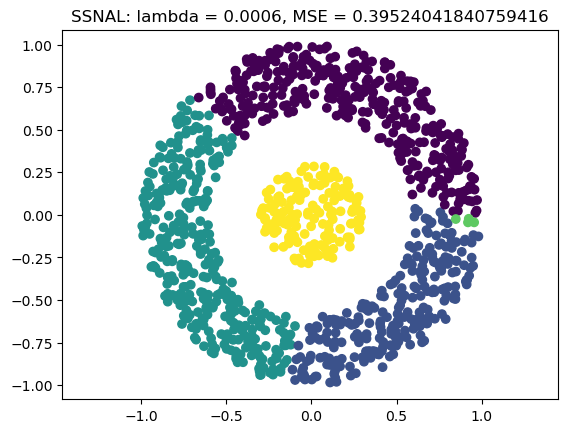

In [ ]:
plt.scatter(X_anulus[:, 0], X_anulus[:, 1], c=pred)

plt.title(f"SSNAL: lambda = {lambd}, MSE = {mse}")  # Title of the plot
plt.axis('equal')  # Equal aspect ratio

plt.show()

In [ ]:
centroid_bound(X_anulus, gamma, lambd)

2.209381276739618

In [ ]:
N, d, d_prime = 10000000000, 2, 4/3
gamma = N**(3/(4*d))
gamma*N**(-1/max(d,2))*(np.log(N))**(1/d_prime)+(1+lambd)*gamma**(-1/3)

0.647368971612564